In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [237]:
data = pd.read_csv("data.csv")
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1969-10-13,93.559998,94.860001,93.199997,94.550003,94.550003,13620000
1,1969-10-14,94.550003,96.529999,94.320000,95.699997,95.699997,19950000
2,1969-10-15,95.699997,96.559998,94.650002,95.720001,95.720001,15740000
3,1969-10-16,95.720001,97.540001,95.050003,96.370003,96.370003,19500000
4,1969-10-17,96.370003,97.239998,95.379997,96.260002,96.260002,13740000


In [238]:
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,12614.000000,12614.000000,12614.000000,12614.000000,12614.000000,1.261400e+04
mean,804.955881,809.684315,799.922962,805.128490,805.128490,1.321124e+09
std,743.595826,747.094008,739.739642,743.668664,743.668664,1.709035e+09
min,62.279999,63.230000,60.959999,62.279999,62.279999,6.650000e+06
25%,131.232502,132.649994,129.915001,131.262497,131.262497,5.667250e+07
50%,467.059998,468.914993,465.544999,467.089997,467.089997,3.046950e+08
75%,1277.127533,1283.952484,1267.552551,1277.345001,1277.345001,2.606752e+09
max,3024.469971,3027.979980,3014.300049,3025.860107,3025.860107,1.145623e+10


In [239]:
#  There is a higher probability of having closing price the eod
closing_price_prob = data["Close"] > data["Open"] 
print("There are {0:.2f}% of {1} in the dataset".format(
    (closing_price_prob.value_counts().max() / closing_price_prob.count())*100,
    closing_price_prob.value_counts().idxmax())
)

There are 52.58% of True in the dataset


In [240]:
# Check if there are Null/Nan values in the data. 
print("Are there Null/NAN value in the data? ", data.isnull().values.any())




Are there Null/NAN value in the data?  False


In [241]:
# AdjClose is more important to us than close. So, we will drop close column  
data.drop(["Close"], axis=1, inplace=True)

# rename Adj Close to close. 
data.rename(columns={ "Adj Close": "Close"}, inplace=True)

# convert Date to a more readable and presentable format
data['Date'] = pd.to_datetime(data['Date'])
data.head()


,Date,Open,High,Low,Close,Volume
0,1969-10-13,93.559998,94.860001,93.199997,94.550003,13620000
1,1969-10-14,94.550003,96.529999,94.320000,95.699997,19950000
2,1969-10-15,95.699997,96.559998,94.650002,95.720001,15740000
3,1969-10-16,95.720001,97.540001,95.050003,96.370003,19500000
4,1969-10-17,96.370003,97.239998,95.379997,96.260002,13740000


In [242]:
# data = data.set_index('Date')
data.index= data.Date
data = data[['Close']]

In [243]:
# Reampling data to daily frequency
df = data.resample('D').mean()

# Resmpling data to monthly frequency
df_month = data.resample('M').mean()

# Resampling data to annual frequency
df_year = data.resample('A-DEC').mean()

# Resampling data to quarterly freqeuncy
df_Q = df.resample('Q-DEC').mean()

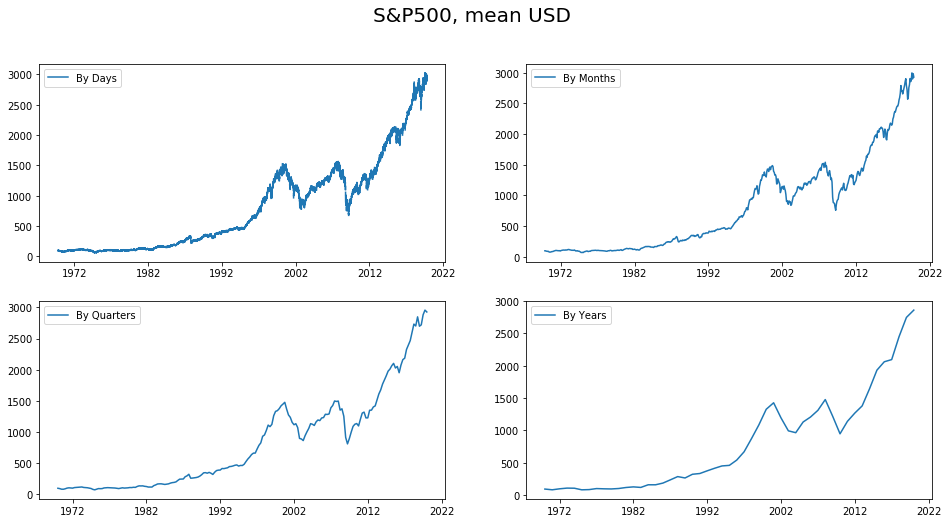

In [244]:


fig = plt.figure(figsize=[16, 8])
plt.suptitle('S&P500, mean USD', fontsize=20)

plt.subplot(221)
plt.plot(df.Close, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Close, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Close, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Close, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

In [245]:
# Spliting the data into training and testing data
from sklearn.model_selection import train_test_split

# split data from the split date
split_date = '2019-05-21'
train_data = data.loc[data.index <= split_date].copy()
test_data = data.loc[data.index > split_date].copy()

training_data = train_data.values
testing_data = test_data.values
print("Train data contains", len(training_data), "rows")
print("Test data contains", len(testing_data), "rows")


Train data contains 12514 rows
Test data contains 100 rows


In [246]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

training_set = scaler.fit_transform(training_data)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [247]:
X_train.shape

(12513, 1, 1)

In [248]:
y_train.shape

(12513, 1)

In [249]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)

Epoch 1/100
 - 3s - loss: 0.0762
Epoch 2/100
 - 1s - loss: 0.0426
Epoch 3/100
 - 1s - loss: 0.0260
Epoch 4/100
 - 1s - loss: 0.0178
Epoch 5/100
 - 1s - loss: 0.0132
Epoch 6/100
 - 1s - loss: 0.0103
Epoch 7/100
 - 1s - loss: 0.0085
Epoch 8/100
 - 1s - loss: 0.0071
Epoch 9/100
 - 1s - loss: 0.0062
Epoch 10/100
 - 1s - loss: 0.0053
Epoch 11/100
 - 1s - loss: 0.0047
Epoch 12/100
 - 1s - loss: 0.0041
Epoch 13/100
 - 1s - loss: 0.0039
Epoch 14/100
 - 1s - loss: 0.0035
Epoch 15/100
 - 1s - loss: 0.0033
Epoch 16/100
 - 1s - loss: 0.0031
Epoch 17/100
 - 1s - loss: 0.0029
Epoch 18/100
 - 1s - loss: 0.0027
Epoch 19/100
 - 1s - loss: 0.0027
Epoch 20/100
 - 1s - loss: 0.0025
Epoch 21/100
 - 1s - loss: 0.0024
Epoch 22/100
 - 1s - loss: 0.0023
Epoch 23/100
 - 1s - loss: 0.0022
Epoch 24/100
 - 1s - loss: 0.0021
Epoch 25/100
 - 1s - loss: 0.0020
Epoch 26/100
 - 1s - loss: 0.0019
Epoch 27/100
 - 1s - loss: 0.0018
Epoch 28/100
 - 1s - loss: 0.0017
Epoch 29/100
 - 1s - loss: 0.0017
Epoch 30/100
 - 1s - lo

In [250]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [251]:
# Predictions

inputs = np.reshape(testing_data, (len(testing_data), 1))
inputs = scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_close = model.predict(inputs)
predicted_close = scaler.inverse_transform(predicted_close)


In [252]:
test_data['lstm'] = predicted_close
test_data.head()
display(test_data.describe())

,Close,lstm
count,100.000000,100.000000
mean,2930.858997,2939.579346
std,65.531216,62.016899
min,2744.449951,2763.093262
25%,2887.452575,2898.507629
50%,2938.109985,2946.450317
75%,2984.532471,2990.373840
max,3025.860107,3029.463135


In [253]:
all_data = pd.concat([train_data, test_data], sort=False)
all_data.describe()
all_data.head()

,Close,lstm
Date,,
1969-10-13,94.550003,NaN
1969-10-14,95.699997,NaN
1969-10-15,95.720001,NaN
1969-10-16,96.370003,NaN
1969-10-17,96.260002,NaN


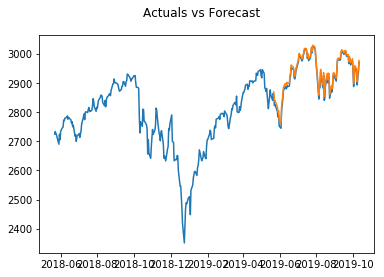

In [254]:
# Plot: forecast vs actual data


split_date = '2018-05-21'
x = all_data.loc[all_data.index > split_date].copy()

plt.plot(x[['Close', 'lstm']])


plot = plt.suptitle('Actuals vs Forecast')

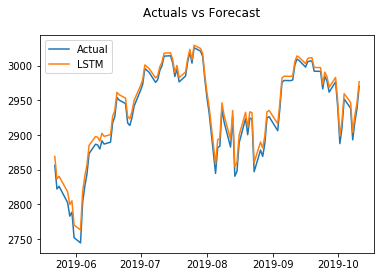

In [255]:
#  train data vs forcast data

plt.plot(test_data[['Close']], label="Actual")
plt.plot(test_data[['lstm']], label="LSTM")

plt.legend(loc='upper left')
plot = plt.suptitle('Actuals vs Forecast')

In [256]:
# calculate MSE and MAE for LSTM

from sklearn.metrics import mean_squared_error, mean_absolute_error
lstm_mse = mean_squared_error(y_true=test_data['Close'],
                   y_pred=test_data['lstm'])

print("Mean squared error for LSTM is: ", lstm_mse)


Mean squared error for LSTM is:  88.27652845148504


In [257]:
lstm_mae = mean_absolute_error(y_true=test_data['Close'],
                   y_pred=test_data['lstm'])

print("Mean absolute error for LSTM is: ", lstm_mae)


Mean absolute error for LSTM is:  8.720634737656269


In [212]:

# ARIMA

In [213]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [65]:
split_date = '2010-01-21'
df_month = df_month.loc[df_month.index > split_date].copy()
df_month.head()

,Close
Date,
2010-01-31,1123.581581
2010-02-28,1089.159989
2010-03-31,1152.048690
2010-04-30,1197.316185
2010-05-31,1125.062006


In [66]:



def is_stationary(df):
#     Rolling stats
    rolling_mean = df.rolling(window = 12).mean()
    rolling_std = df.rolling(window = 12).std()
    
#    Stats Plot
    plt.figure(figsize=[20, 8])
    plt.plot(df, color = 'blue', label = 'Original')
    plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.show()
    
# Dickey-Fuller test
    result = adfuller(df['Close'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

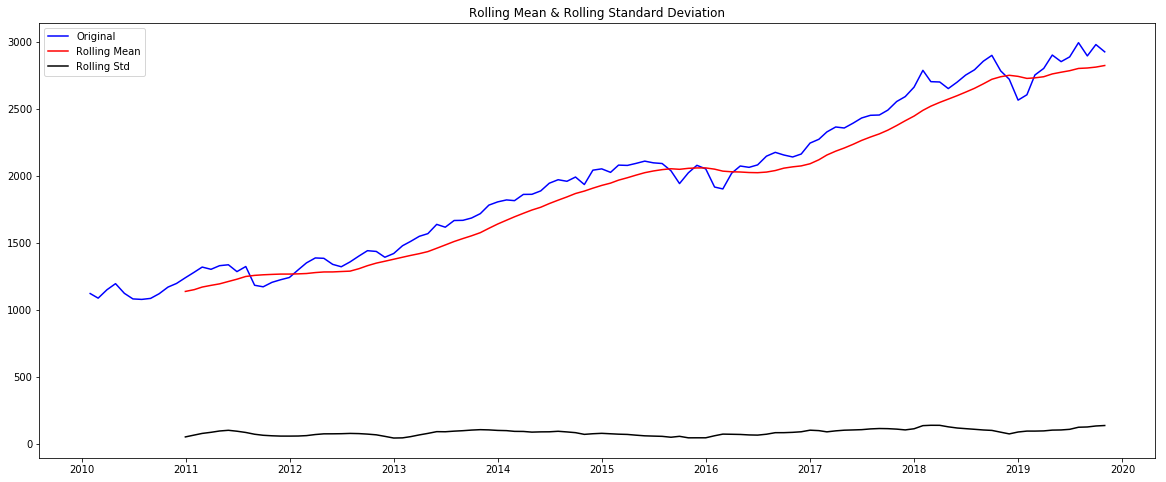

ADF Statistic: -0.06718565601268406
p-value: 0.9526104613877461
Critical Values:
	1%: -3.49181775886872
	5%: -2.8884437992971588
	10%: -2.5811201893779985


In [67]:
is_stationary(df_month)

In [68]:
# From the diagram above, we can see that the rolling mean and standard deviation increases with time. 
# Therefore, it can be concluded thay the time series is not stationary


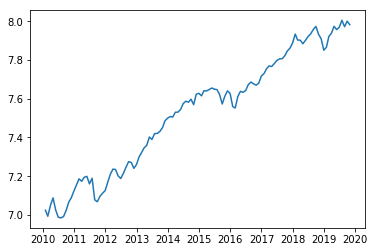

In [69]:
# To lower the dependent variable, we take the log. 
df_month_log = np.log(df_month)
plt.plot(df_month_log)


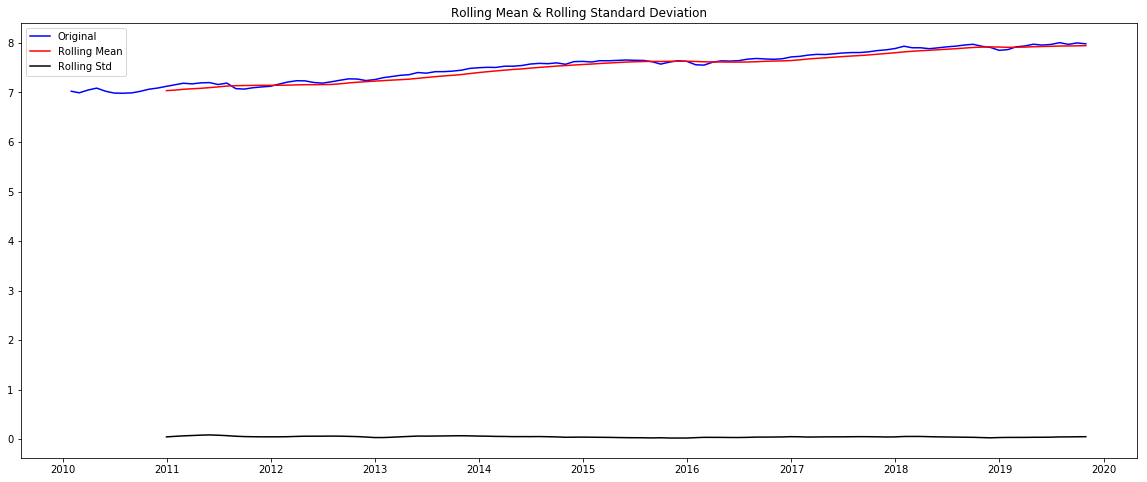

ADF Statistic: -0.7321343549041404
p-value: 0.8382495356353203
Critical Values:
	1%: -3.487517288664615
	5%: -2.8865777180380032
	10%: -2.5801239192052012


In [70]:
is_stationary(df_month_log)

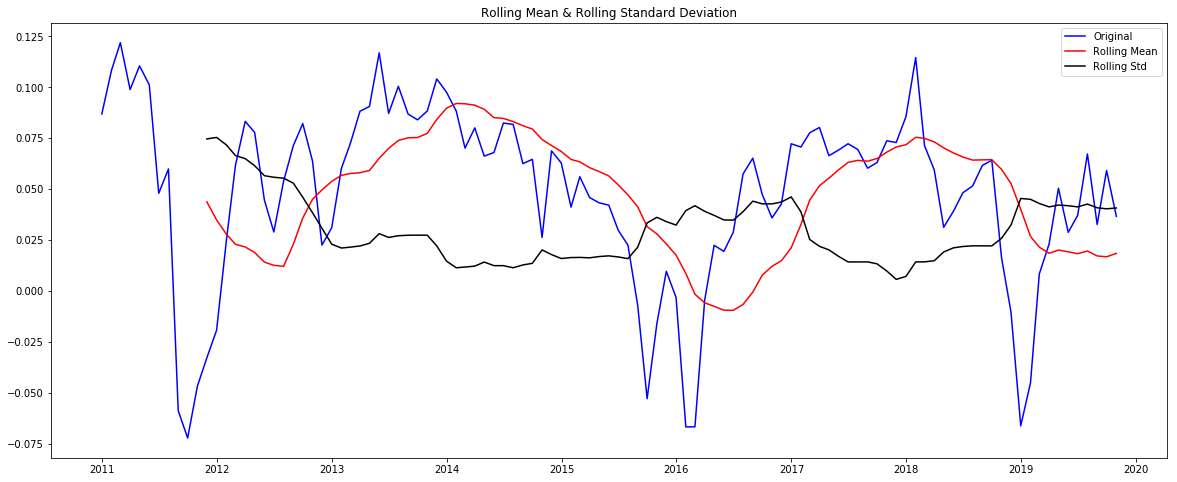

ADF Statistic: -2.910444595653047
p-value: 0.0441468445329912
Critical Values:
	1%: -3.4989097606014496
	5%: -2.891516256916761
	10%: -2.5827604414827157


In [71]:
# Subtract rolling mean from log

rolling_mean = df_month_log.rolling(window=12).mean()
df_log_minus_mean = df_month_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
is_stationary(df_log_minus_mean)

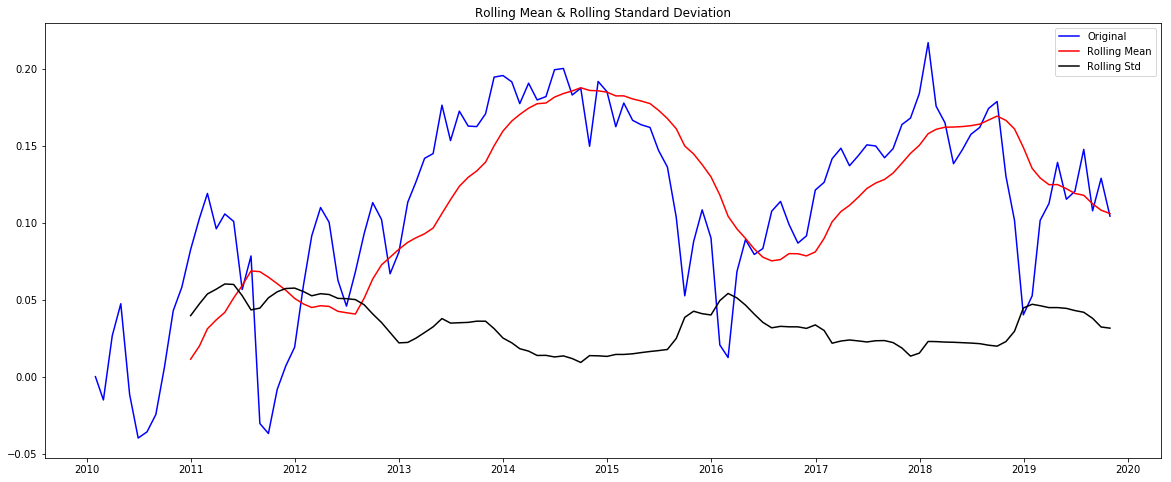

ADF Statistic: -2.7060442339572948
p-value: 0.07299817989604077
Critical Values:
	1%: -3.487517288664615
	5%: -2.8865777180380032
	10%: -2.5801239192052012


In [72]:
# Apply Exponential decay 
rolling_mean_exp_decay = df_month_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_month_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
is_stationary(df_log_exp_decay)


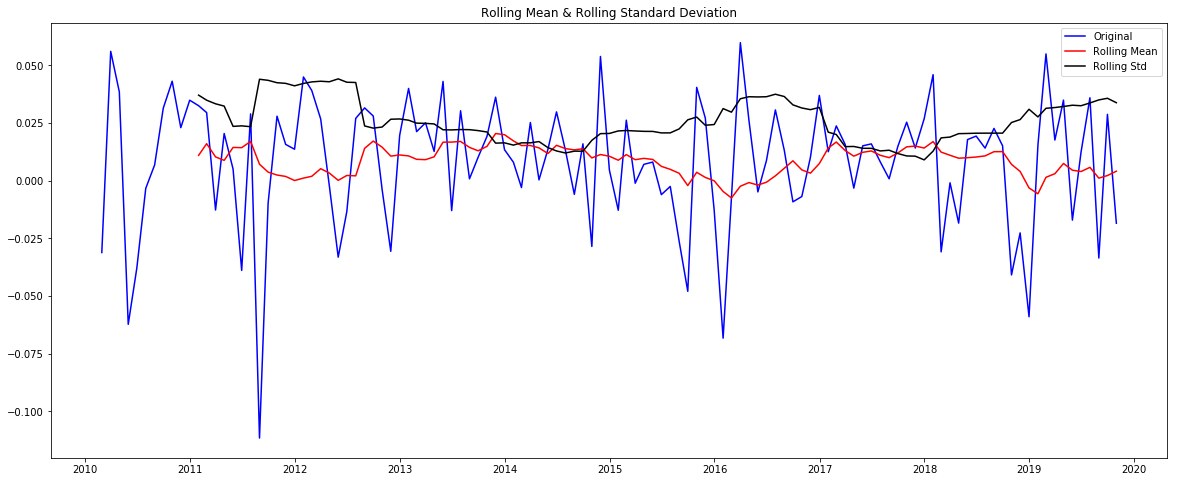

ADF Statistic: -9.859864976636146
p-value: 4.2614350514587136e-17
Critical Values:
	1%: -3.4880216384691867
	5%: -2.8867966864160075
	10%: -2.5802408234244947


In [73]:
# Apply time shifting

df_log_shift = df_month_log - df_month_log.shift()
df_log_shift.dropna(inplace=True)
is_stationary(df_log_shift)

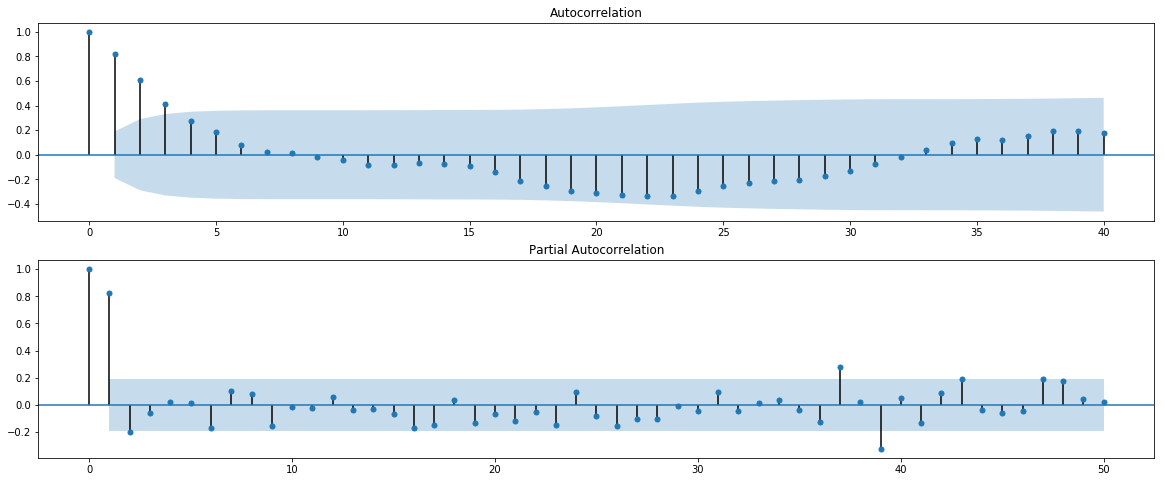

In [74]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(20,8))
plt.subplot(211)
plot_acf(df_log_minus_mean, ax=plt.gca(),lags=40)
plt.subplot(212)
plot_pacf(df_log_minus_mean, ax=plt.gca(), lags=50)
plt.show()

/Users/rotimi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


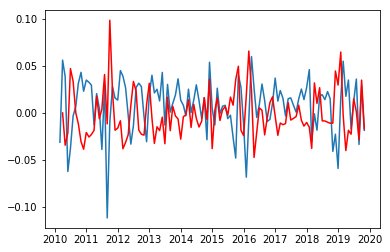

In [270]:

model = ARIMA(df_month_log, order=(3,2,2))
results = model.fit()
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')




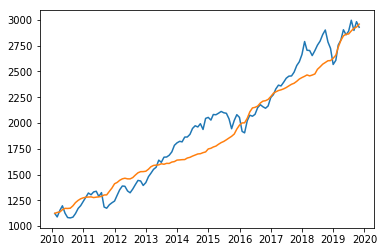

In [76]:
# Model in comparison with original time series

predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_month_log['Close'].iloc[0], index=df_month_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_month)
plt.plot(predictions_ARIMA)

/Users/rotimi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


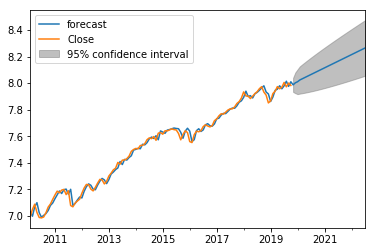

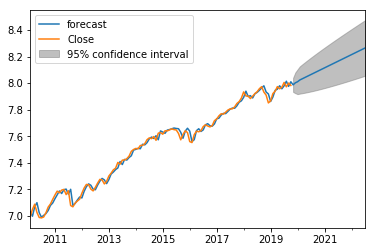

In [77]:
results.plot_predict(1,150)

In [78]:
mean_squared_error(y_true=df_month,
                   y_pred=predictions_ARIMA)

22809.681087522455

In [79]:
mean_absolute_error(y_true=df_month,
                   y_pred=predictions_ARIMA)

119.5931339369726

In [80]:
# RandomForestClassifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_data = pd.read_csv("data.csv")
rf_data.index = pd.to_datetime(rf_data['Date'])


In [83]:
del rf_data['Date']

In [84]:
rf_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-07,2944.229980,2959.750000,2935.679932,2938.790039,2938.790039,2940140000
2019-10-08,2920.399902,2925.469971,2892.659912,2893.060059,2893.060059,3356450000
2019-10-09,2911.100098,2929.320068,2907.409912,2919.399902,2919.399902,2726820000
2019-10-10,2918.550049,2948.459961,2917.120117,2938.129883,2938.129883,3217250000
2019-10-11,2963.070068,2993.280029,2963.070068,2970.270020,2970.270020,3580460000


In [85]:
# split data from the split date
split_date = '2019-05-21'
rf_train_data = rf_data.loc[rf_data.index <= split_date].copy()
rf_test_data = rf_data.loc[rf_data.index > split_date].copy()

In [86]:
X_rf_train = rf_train_data[['Open', 'High', 'Low', 'Volume']]
y_rf_train = rf_train_data[['Adj Close']]

X_rf_test = rf_test_data[['Open', 'High', 'Low', 'Volume']]
y_rf_test = rf_test_data[['Adj Close']]


In [87]:
print('len X_train', len(X_rf_train))
print('len y_train', len(y_rf_train))
print('len X_test', len(X_rf_test))
print('len y_test', len(y_rf_test))

len X_train 12514
len y_train 12514
len X_test 100
len y_test 100


In [88]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(y_rf_train.values.ravel())
training_y = lab_enc.transform(y_rf_train.values.ravel())



In [89]:

tree = RandomForestClassifier()
tree.fit(X_rf_train.values, training_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
pred = tree.predict(X_rf_test)

In [91]:
# Convert the predicted value back. 
decoded_pred = lab_enc.inverse_transform(pred)


/Users/rotimi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [92]:
test_data['rf'] = decoded_pred

In [93]:
test_data

,Close,lstm,rf
Date,,,
2019-05-22,2856.270020,2841.389893,2864.360107
2019-05-23,2822.239990,2809.634521,2811.870117
2019-05-24,2826.060059,2813.204346,2850.399902
2019-05-28,2802.389893,2790.885742,2822.429932
2019-05-29,2783.020020,2772.238037,2771.449951
...,...,...,...
2019-10-07,2938.790039,2918.354980,2943.030029
2019-10-08,2893.060059,2875.704590,2901.610107
2019-10-09,2919.399902,2900.271240,2901.129883


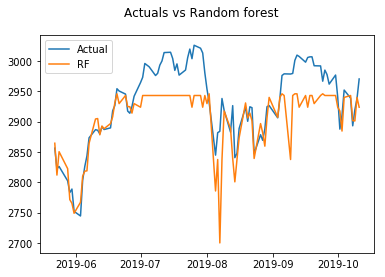

In [94]:
plt.plot(test_data[['Close']], label="Actual")
plt.plot(test_data['rf'], label="RF") # random forest

plt.legend(loc='upper left')
plot = plt.suptitle('Actuals vs Random forest')


In [102]:
mse = mean_squared_error(y_true=test_data[['Close']], y_pred=test_data['rf'])
print("Mean squared error for random forest is: ", mse)


Mean squared error for random forest is:  2135.7122222907983


In [101]:
mae = mean_absolute_error(y_true=test_data[['Close']],
                   y_pred=test_data['rf'])
print("Mean absolute error random forest is: ", mae)

Mean absolute error random forest is:  33.97790048999998


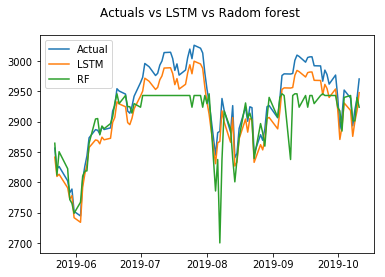

In [97]:
#  Actual vs forcasted 

plt.plot(test_data[['Close']], label="Actual")
plt.plot(test_data[['lstm']], label="LSTM") 
plt.plot(test_data[['rf']], label="RF") # random forest




plt.legend(loc='upper left')
plot = plt.suptitle('Actuals vs LSTM vs Radom forest ')

Reference

https://www.kaggle.com/myonin/bitcoin-price-prediction-by-arima

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


https://ademos.people.uic.edu/Chapter23.html

https://www.kaggle.com/someadityamandal/bitcoin-time-series-forecasting

https://www.kaggle.com/myonin/bitcoin-price-prediction-by-arima

https://machinelearningmastery.com/time-series-forecasting-python-mini-course/

https://www.youtube.com/watch?v=7vunJlqLZok

https://www.kaggle.com/kp4920/s-p-500-stock-data-time-series-analysis

https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/


https://www.datacamp.com/community/tutorials/lstm-python-stock-market



https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average